# Lab 1: Data Analysis with Python
In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. A template notebook is provided in the lab; your job is to complete the ten questions.

In [63]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import pickle

In [64]:
data = pd.read_csv('lab1_kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1: Display the data types of each column using the function dtypes

In [65]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Question 2: Drop the columns 'id' and 'Unnamed: 0', then describe the data
- In the dataset don't have column 'Unnamed: 0'.
- Drop column 'date'


In [66]:
data.drop(columns=['id', 'date'], axis=1, inplace=True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 3: Count the number of unique floor values and convert to DataFrame

In [67]:
data['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4: Boxplot of price for houses with or without waterfront view

#### 4.1 waterfront

In [68]:
waterfront_houses = data[data['waterfront'] == 1]['price']
no_waterfront_houses = data[data['waterfront'] == 0]['price']

In [69]:
# Count outliers waterfront
iqr_waterfront = waterfront_houses.quantile(0.75) - waterfront_houses.quantile(0.25)
outliers_waterfront = waterfront_houses[(waterfront_houses < waterfront_houses.quantile(0.25) - 1.5 * iqr_waterfront) | (waterfront_houses > waterfront_houses.quantile(0.75) + 1.5 * iqr_waterfront)]
outliers_waterfront_count = len(outliers_waterfront)
print(f"Number of outliers in the price of waterfront houses: {outliers_waterfront_count}")

# Count outliers of NO waterfront
iqr_no_waterfront = no_waterfront_houses.quantile(0.75) - no_waterfront_houses.quantile(0.25)
outliers_no_waterfront = no_waterfront_houses[(no_waterfront_houses < no_waterfront_houses.quantile(0.25) - 1.5 * iqr_no_waterfront) | (no_waterfront_houses > no_waterfront_houses.quantile(0.75) + 1.5 * iqr_no_waterfront)]
outliers_no_waterfront_count = len(outliers_no_waterfront)
print(f"Number of outliers in the price of non-waterfront houses: {outliers_no_waterfront_count}")

Number of outliers in the price of waterfront houses: 5
Number of outliers in the price of non-waterfront houses: 1063


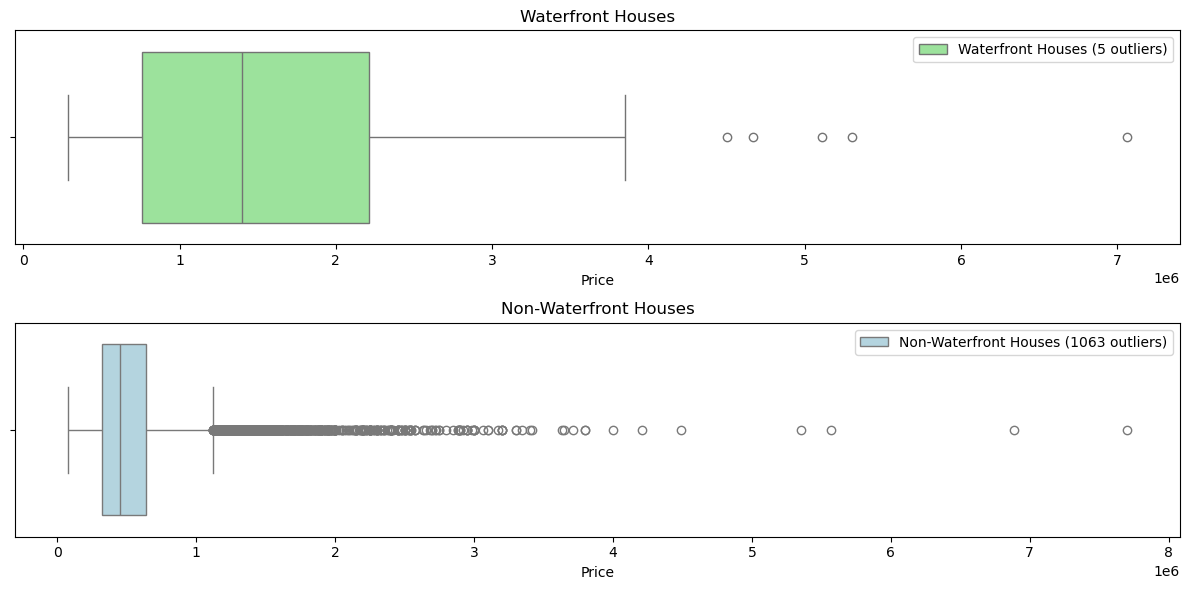

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Waterfront houses boxplot
sns.boxplot(x=waterfront_houses, ax=ax1, color='lightgreen')
ax1.title.set_text('Waterfront Houses')
ax1.set_xlabel('Price')

# Non-waterfront houses boxplot
sns.boxplot(x=no_waterfront_houses, ax=ax2, color='lightblue')
ax2.title.set_text('Non-Waterfront Houses')
ax2.set_xlabel('Price')

# Add legend
ax1.legend(['Waterfront Houses (5 outliers)'], loc='upper right')
ax2.legend(['Non-Waterfront Houses (1063 outliers)'], loc='upper right')

plt.tight_layout()
plt.show()

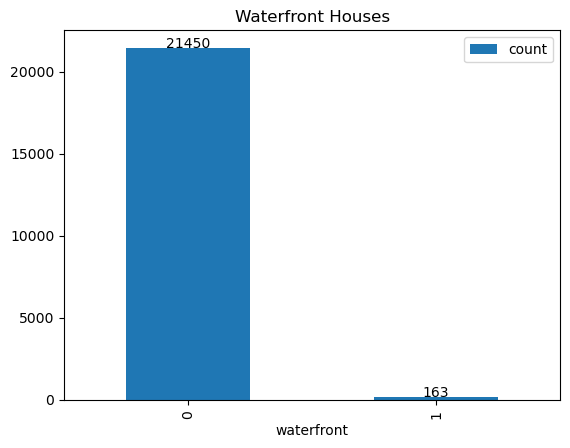

In [71]:
data['waterfront'].value_counts().to_frame().plot(kind='bar')
plt.title('Waterfront Houses')

# show number above the bars
for i in range(2):
    plt.text(i, data['waterfront'].value_counts().values[i], data['waterfront'].value_counts().values[i], ha='center')

plt.show()

#### 4.2  bedrooms
Drop outliers

<Axes: xlabel='bedrooms'>

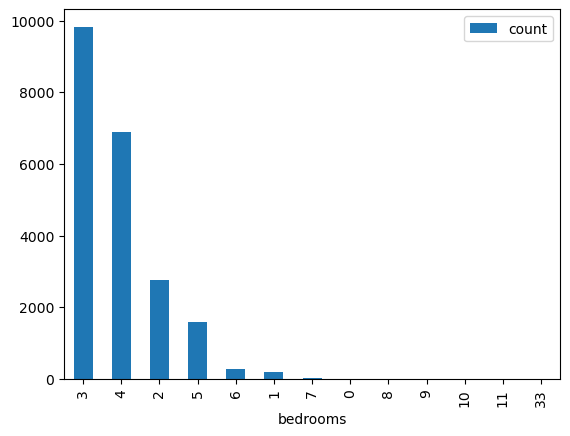

In [72]:
data['bedrooms'].value_counts().to_frame().plot(kind='bar')

In [73]:
data['bedrooms'].value_counts().to_frame()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


In [74]:
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [75]:
data[data['bedrooms'] == 11]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [76]:
# drop the row with 33 and 11 bedrooms
data.drop(index=[15870, 8757], inplace=True)

In [77]:
data['bedrooms'].value_counts().to_frame()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


#### 4.3 bathrooms
Round the bathrooms

In [78]:
data['bathrooms'].value_counts().to_frame()

,count
bathrooms,
2.50,5380
1.00,3852
1.75,3047
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,752
3.50,731


In [79]:
data['bathrooms'] = data['bathrooms'].round()
data['bathrooms'].value_counts().to_frame()

,count
bathrooms,
2.0,13850
1.0,3933
3.0,2526
4.0,1201
5.0,57
6.0,24
0.0,14
8.0,4
7.0,2


#### 4.4 Sqft_living, Sqft_above, Sqft_basement

In [80]:
data[['sqft_living', 'sqft_above', 'sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0
1,2570,2170,400
2,770,770,0
3,1960,1050,910
4,1680,1680,0
...,...,...,...
21608,1530,1530,0
21609,2310,2310,0
21610,1020,1020,0
21611,1600,1600,0


In [81]:
sqft_living = data['sqft_above'] + data['sqft_basement']

In [82]:
data[sqft_living != data['sqft_living']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


--> sqft_living is a derived attribute from sqft_above and sqft_basement --> Drop sqft_living

In [83]:
data.drop(columns='sqft_living', axis=1, inplace=True)

#### 4.5 Heatmap

In [84]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [85]:
categories_columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
numerical_columns = ['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

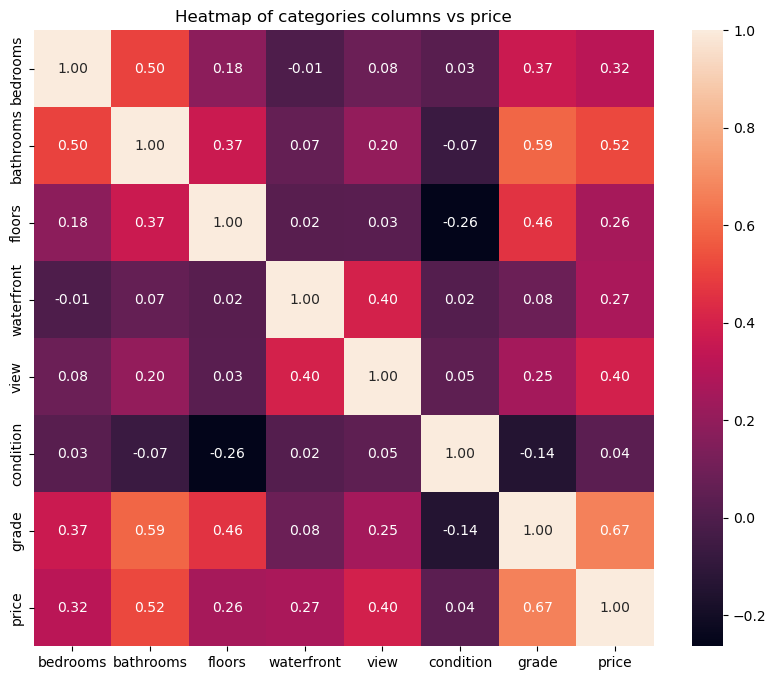

In [86]:
# Visualize heatmap of categories columns vs price
plt.figure(figsize=(10, 8))
sns.heatmap(data[categories_columns + ['price']].corr(), annot=True, fmt='.2f')
plt.title('Heatmap of categories columns vs price')
plt.show()


condition have correlation with price = 0.04 (not important) --> Current condition of the house does not affect the value of the house much.
--> Drop it

In [87]:
data.drop(columns='condition', axis=1, inplace=True)

In [88]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Visualize heatmap of numerical columns vs price
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns + ['price']].corr(), annot=True, fmt='.2f')
plt.title('Heatmap of numerical columns vs price')
plt.xticks(rotation=45)
plt.show()

Zipcode, lat, long' are commonly used to represent the location of the property on a map, and as we can see, these attributes are not too important here, so we will remove them.

In [90]:
data.drop(columns=['zipcode', 'lat', 'long'], axis=1, inplace=True) 

In [91]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

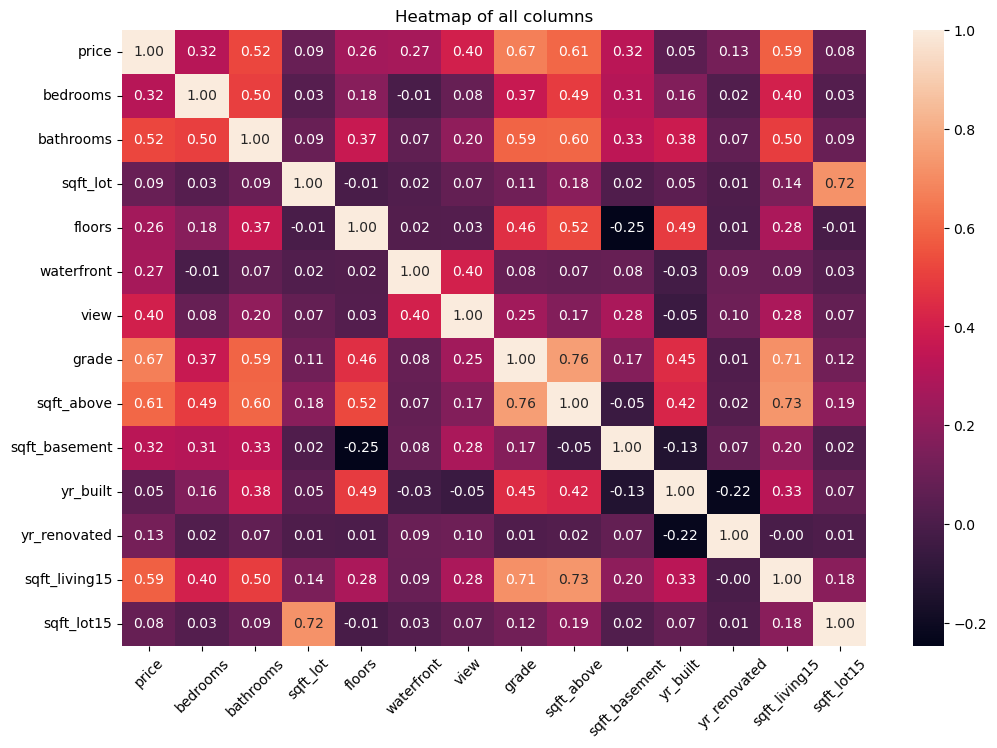

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Heatmap of all columns')
plt.xticks(rotation=45)
plt.show()

### Question 5: Regression plot of price vs sqft_above

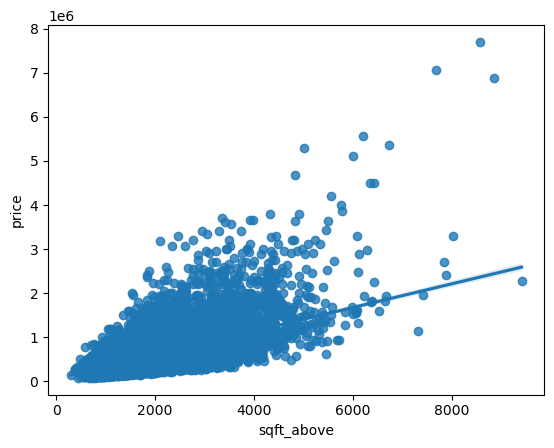

In [93]:
sns.regplot(x='sqft_above', y='price', data=data)
plt.show()

### Question 6: Linear regression model for 'price' using 'sqft_living' and calculate R^2
In 4.4 because sqft_living was a derived attribute from sqft_above and sqft_basement so I dropped sqft_living

### Question 7: Linear regression with multiple features and calculate R^2

In [94]:
features = data.columns.drop('price')

X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_multiple_features = r2_score(y_test, y_pred)
print('R^2 score:' , r2_multiple_features)

R^2 score: 0.6595467510290739


### Question 8: Create a list of tuples for the pipeline

In [96]:
pipeline_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

### Question 9: Use the pipeline to predict and calculate R^2

In [97]:
pipeline = Pipeline(pipeline_steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [98]:
y_pred_pipeline = pipeline.predict(X_test)
r2_pipeline = r2_score(y_test, y_pred_pipeline)
print('R^2 score', r2_pipeline)

R^2 score 0.7147163014379692


### Question 10: Ridge regression with regularization parameter 0.1 and calculate R^2

In [99]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('R^2 score', r2_ridge)

R^2 score 0.6595447433056004


### Question 11: Polynomial transform and Ridge regression with regularization 0.1

In [100]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=0.1))]
Ridge_poly_model = Pipeline(Input)
Ridge_poly_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.1))])

In [101]:
y_pred_ridge_poly = Ridge_poly_model.predict(X_test)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
print('R^2 score', r2_ridge_poly)

R^2 score 0.714702955237583


### Optimized model

In [102]:
# optimize the model with GridSearchCV
parameters = [{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid = GridSearchCV(Ridge_poly_model, parameters, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge(alpha=0.1))]),
             param_grid=[{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                           1000]}])

In [103]:
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)
print('Best estimator:', grid.best_estimator_)

Best parameters: {'model__alpha': 100}
Best score: 0.7312287904710206
Best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=100))])


In [104]:
y_pred_grid = grid.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print('R^2 score:', r2_grid)

R^2 score: 0.715715860680088


### Save model

In [105]:
with open ('ridge_poly_model.pkl', 'wb') as file:
    pickle.dump(grid, file)

In [106]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')